# df

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path_prefix = '/content/drive/MyDrive/final project/'

file = "churn.csv"

In [3]:
import numpy as np 
import pandas as pd
from sklearn.metrics import f1_score, recall_score, accuracy_score, roc_auc_score, confusion_matrix

In [4]:
df = pd.read_csv(path_prefix+file)

In [5]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.shape

(10000, 14)

Removing irrelevant columns

In [7]:
df.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace = True)
df.shape

(10000, 11)

Checking for null values

In [8]:
df.isnull().values.any()

False

In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Checking for outliers

In [10]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# plot relationship

Plot for relationship between Age and Exit Status

In [11]:
import matplotlib.pyplot as plt

Age_Exited = df[df.Exited == 1].Age
Age_NotExited = df[df.Exited == 0].Age

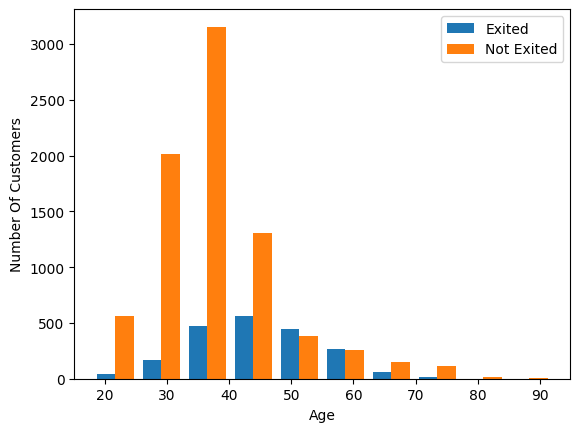

In [12]:
plt.xlabel("Age")
plt.ylabel("Number Of Customers")
plt.hist([Age_Exited,Age_NotExited],label=['Exited','Not Exited'])
plt.legend()

Plot for relationship between Balance and Exit Status

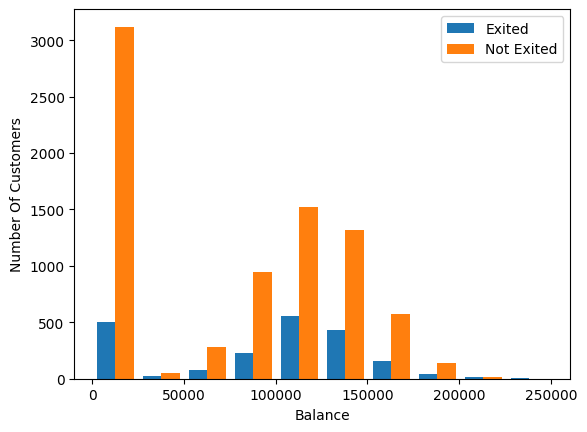

In [13]:
Balance_Exited = df[df.Exited == 1].Balance
Balance_NotExited = df[df.Exited == 0].Balance

plt.xlabel("Balance")
plt.ylabel("Number Of Customers")
plt.hist([Balance_Exited,Balance_NotExited],label=['Exited','Not Exited'])
plt.legend()

In [14]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

Plot for relationship between Gender and Exit Status

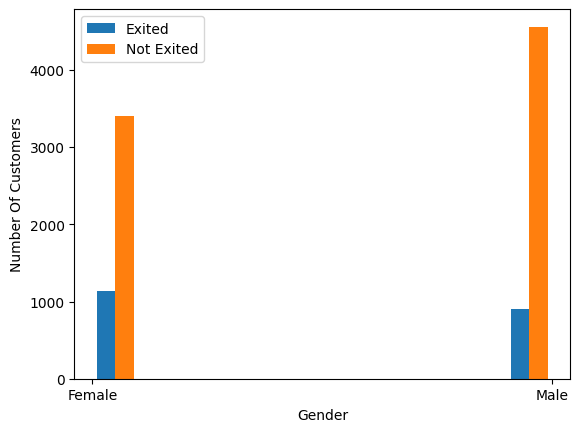

In [15]:
Gender_Exited = df[df.Exited == 1].Gender
Gender_NotExited = df[df.Exited == 0].Gender

plt.xlabel("Gender")
plt.ylabel("Number Of Customers")
plt.hist([Gender_Exited,Gender_NotExited],label=['Exited','Not Exited'])
plt.legend()

Females are exiting more than the males.

In [16]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

Plot for relationship between Geography and Exit Status

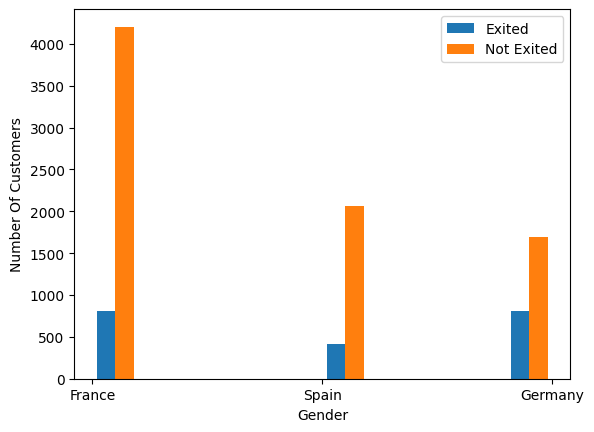

In [17]:
Geography_Exited = df[df.Exited == 1].Geography
Geography_NotExited = df[df.Exited == 0].Geography

plt.xlabel("Gender")
plt.ylabel("Number Of Customers")
plt.hist([Geography_Exited,Geography_NotExited],label=['Exited','Not Exited'])
plt.legend()

Plot for relationship between CreditScore and Exit Status

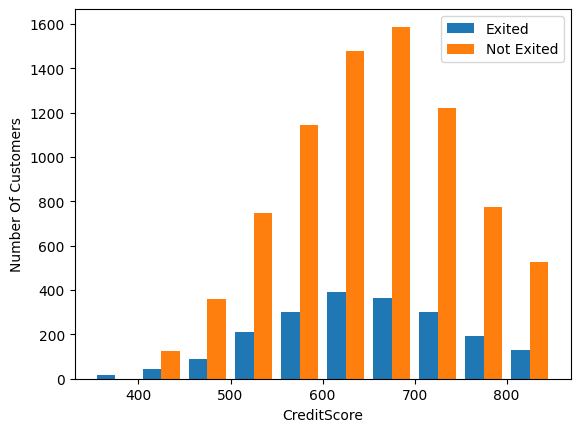

In [18]:
CreditScore_Exited = df[df.Exited == 1].CreditScore
CreditScore_NotExited = df[df.Exited == 0].CreditScore

plt.xlabel("CreditScore")
plt.ylabel("Number Of Customers")
plt.hist([CreditScore_Exited,CreditScore_NotExited],label=['Exited','Not Exited'])
plt.legend()

Plot for relationship between NumOfProducts  and Exit Status

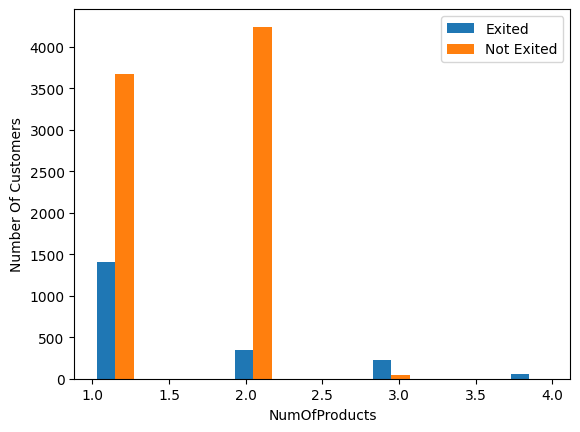

In [19]:
NumOfProducts_Exited = df[df.Exited == 1].NumOfProducts
NumOfProducts_NotExited = df[df.Exited == 0].NumOfProducts

plt.xlabel("NumOfProducts")
plt.ylabel("Number Of Customers")
plt.hist([NumOfProducts_Exited,NumOfProducts_NotExited],label=['Exited','Not Exited'])
plt.legend()

# Processing Model

 One Hot Encoding for Geography and Gender Columns:

In [20]:
df2 = pd.get_dummies(data = df,columns=['Geography','Gender'])
df2.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


Scaling Columns

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[['CreditScore','EstimatedSalary','Balance','Age']] = scaler.fit_transform(df2[['CreditScore','EstimatedSalary','Balance','Age']])

Spliting into X and Y and then using train_test_split

In [22]:
X = df2.drop('Exited',axis = 1)
y = df2['Exited']

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

Model Formation

In [24]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(32,input_shape = (13,),activation='relu'),
     keras.layers.Dense(16,activation='relu'),
     keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss = 'binary_crossentropy',metrics=['accuracy'])

# Sampling

In [25]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import TomekLinks

from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek

In [26]:
sampling_list = ['original','ros','sm','ada','rus','ncr','tl','srus','senn','st']

#oversampling
ros = RandomOverSampler()
sm = SMOTE(random_state=42, n_jobs= -1)
ada = ADASYN(random_state=42, n_jobs= -1)

#undersampling
rus = RandomUnderSampler()
ncr = NeighbourhoodCleaningRule()
tl = TomekLinks()

#hybird
#over = SMOTE(sampling_strategy=0.5)
#under = RandomUnderSampler(sampling_strategy=0.5)
#steps = [('o', over), ('u', under)]
#srus = Pipeline(steps=steps)
srus = 1

senn = SMOTEENN(random_state=32)
st = SMOTETomek(random_state=32)

original = 0

sampling = [original,ros,sm,ada,rus,ncr,tl,srus,senn,st]

In [27]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.5)

X_train_over, y_train_over = over.fit_resample(X_train, y_train)
X_test_over, y_test_over = over.fit_resample(X_test, y_test)

X_train_srus, y_train_srus =  under.fit_resample(X_train_over, y_train_over)
X_test_srus, y_test_srus = under.fit_resample(X_test_over, y_test_over)

# Model Training

In [28]:
def train_model(X_train,y_train,model,sampler,X_train_srus,y_train_srus):
  if sampler == 0:
    model.fit(X_train,y_train,epochs = 50)
  elif sampler == 1:
    model.fit(X_train_srus,y_train_srus,epochs = 50)
  else:
    X_train, y_train = sampler.fit_resample(X_train, y_train)
    model.fit(X_train,y_train,epochs = 50)
  return model

In [29]:
model_list = []
for s in sampling:
  m = train_model(X_train,y_train,model,s,X_train_srus,y_train_srus)
  model_list.append(m)

Epoch 1/50
250/250 [==============================] - 2s 3ms/step - loss: 0.4931 - accuracy: 0.7960
Epoch 2/50
250/250 [==============================] - 1s 3ms/step - loss: 0.4587 - accuracy: 0.8006
Epoch 3/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4424 - accuracy: 0.8084
Epoch 4/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4285 - accuracy: 0.8148
Epoch 5/50
250/250 [==============================] - 1s 4ms/step - loss: 0.4123 - accuracy: 0.8209
Epoch 6/50
250/250 [==============================] - 1s 4ms/step - loss: 0.3981 - accuracy: 0.8301
Epoch 7/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3862 - accuracy: 0.8363
Epoch 8/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3765 - accuracy: 0.8396
Epoch 9/50
250/250 [==============================] - 1s 3ms/step - loss: 0.3720 - accuracy: 0.8410
Epoch 10/50
250/250 [==============================] - 1s 2ms/step - loss: 0.3665 - accuracy: 0.8440

/usr/local/lib/python3.9/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


399/399 [==============================] - 1s 2ms/step - loss: 0.4170 - accuracy: 0.8078
Epoch 2/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4148 - accuracy: 0.8090
Epoch 3/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4114 - accuracy: 0.8103
Epoch 4/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4122 - accuracy: 0.8122
Epoch 5/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4106 - accuracy: 0.8078
Epoch 6/50
399/399 [==============================] - 1s 3ms/step - loss: 0.4100 - accuracy: 0.8115
Epoch 7/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4095 - accuracy: 0.8144
Epoch 8/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4089 - accuracy: 0.8138
Epoch 9/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4069 - accuracy: 0.8150
Epoch 10/50
399/399 [==============================] - 1s 2ms/step - loss: 0.4077 - accuracy: 0.8137
Epoch 11/5

/usr/local/lib/python3.9/dist-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


406/406 [==============================] - 1s 2ms/step - loss: 0.4185 - accuracy: 0.8039
Epoch 2/50
406/406 [==============================] - 1s 2ms/step - loss: 0.4176 - accuracy: 0.8068
Epoch 3/50
406/406 [==============================] - 1s 2ms/step - loss: 0.4170 - accuracy: 0.8058
Epoch 4/50
406/406 [==============================] - 1s 2ms/step - loss: 0.4172 - accuracy: 0.8032
Epoch 5/50
406/406 [==============================] - 1s 2ms/step - loss: 0.4174 - accuracy: 0.8038
Epoch 6/50
406/406 [==============================] - 1s 2ms/step - loss: 0.4142 - accuracy: 0.8067
Epoch 7/50
406/406 [==============================] - 1s 2ms/step - loss: 0.4131 - accuracy: 0.8106
Epoch 8/50
406/406 [==============================] - 1s 2ms/step - loss: 0.4142 - accuracy: 0.8057
Epoch 9/50
406/406 [==============================] - 1s 2ms/step - loss: 0.4147 - accuracy: 0.8085
Epoch 10/50
406/406 [==============================] - 1s 2ms/step - loss: 0.4130 - accuracy: 0.8085
Epoch 11/5

# Result

In [30]:
def sampling_test_data(X_test, y_test, sampler, X_test_srus, y_test_srus):
  if sampler == 0:
    pass
  elif sampler == srus:
    X_test, y_test =  X_test_srus, y_test_srus
  else:
    X_test, y_test = sampler.fit_resample(X_test, y_test, )
  print(1)
  return X_test, y_test

In [31]:
score = {'sample': [],
         'acc': [],
         'roc': [],
         'recall': [],
         'f1_score': [],
         'npv': []}

for mod, sams, s in zip(model_list, sampling_list, sampling):
  X_test, y_test = sampling_test_data(X_test, y_test, s, X_test_srus, y_test_srus)

  y_pred = mod.predict(X_test)
  y_pred_classes = np.round(y_pred).flatten()

  tn, fp, fn, tp = confusion_matrix(y_test, y_pred_classes).ravel()
  score['sample'].append(sams)
  score['acc'].append(accuracy_score(y_test, y_pred_classes))
  score['roc'].append(roc_auc_score(y_test, y_pred_classes))
  score['recall'].append(recall_score(y_test, y_pred_classes))
  score['f1_score'].append(f1_score(y_test, y_pred_classes))
  score['npv'].append(tn/(tn+fn))


pd.DataFrame(score).sort_values(['roc', 'acc', 'recall', 'f1_score','npv'], ascending=False)        

1
63/63 [==============================] - 0s 1ms/step
1
100/100 [==============================] - 0s 1ms/step
1
100/100 [==============================] - 0s 1ms/step


/usr/local/lib/python3.9/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


1
100/100 [==============================] - 0s 1ms/step


/usr/local/lib/python3.9/dist-packages/imblearn/over_sampling/_adasyn.py:156: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


1
100/100 [==============================] - 0s 1ms/step
1
98/98 [==============================] - 0s 1ms/step
1
98/98 [==============================] - 0s 1ms/step
1
75/75 [==============================] - 0s 1ms/step
1
69/69 [==============================] - 0s 1ms/step
1
76/76 [==============================] - 0s 1ms/step


,sample,acc,roc,recall,f1_score,npv
8,senn,0.858646,0.864548,0.808933,0.863576,0.795575
9,st,0.860215,0.860215,0.808933,0.852659,0.826707
7,srus,0.798576,0.779837,0.723618,0.705450,0.858156
6,tl,0.766304,0.765059,0.692908,0.744495,0.738359
5,ncr,0.765815,0.764533,0.692908,0.743975,0.738359
1,ros,0.762084,0.762084,0.688010,0.743051,0.728267
2,sm,0.762084,0.762084,0.688010,0.743051,0.728267
3,ada,0.762084,0.762084,0.688010,0.743051,0.728267
4,rus,0.762084,0.762084,0.688010,0.743051,0.728267
0,original,0.804500,0.758374,0.680590,0.586243,0.911081
